In [81]:

# for dataset storing
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py

In [66]:
df = pd.read_csv("/content/election_results_2024.csv")
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


Leading parties¶


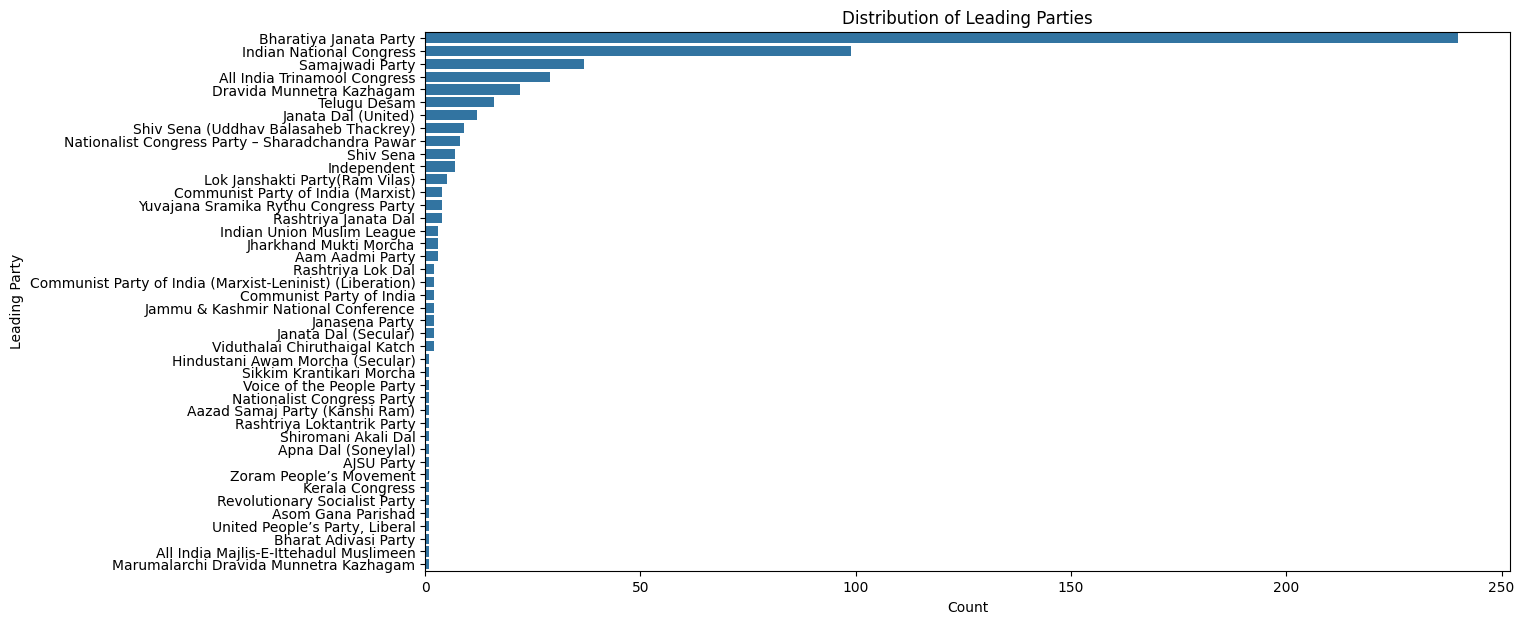

In [68]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

In [69]:
leading_party_counts = df['Leading Party'].value_counts()
leading_party_counts

Leading Party
Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League

from IPython.display import display, Markdown

conclusion_text = """
# **CONCLUSION 1**

### Here are the top 5 leading parties based on the number of constituencies they are leading in:

1. **Bharatiya Janata Party (BJP)**: 240 constituencies
2. **Indian National Congress (INC)**: 99 constituencies
3. **Samajwadi Party (SP)**: 37 constituencies
4. **All India Trinamool Congress (AITC)**: 29 constituencies
5. **Dravida Munnetra Kazhagam (DMK)**: 22 constituencies

The substantial lead of BJP underscores its significant influence and dominance in the current election cycle. The gap between the leading party (BJP) and the second party (INC) highlights the disparity in their electoral success.
"""

display(Markdown(conclusion_text))


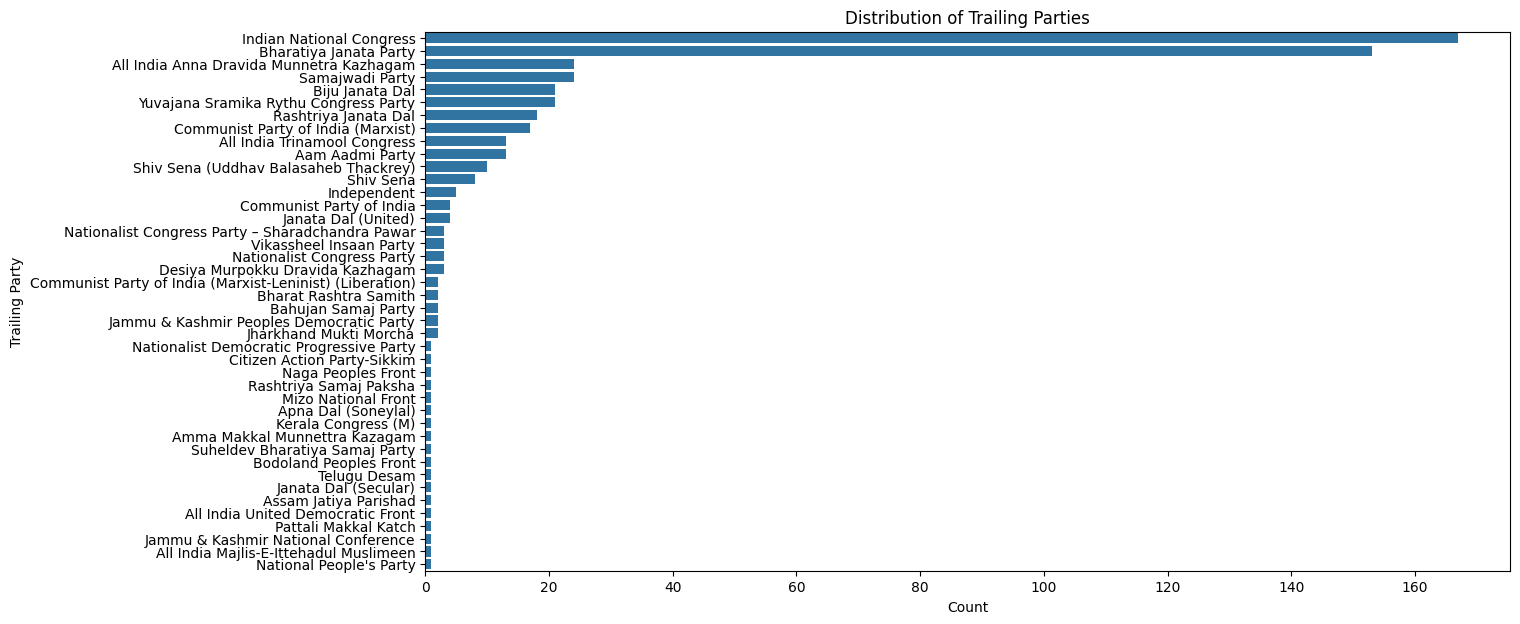

In [70]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Trailing Party', data=df, order=df['Trailing Party'].value_counts().index)
plt.title('Distribution of Trailing Parties')
plt.xlabel('Count')
plt.ylabel('Trailing Party')
plt.show()

Margin¶


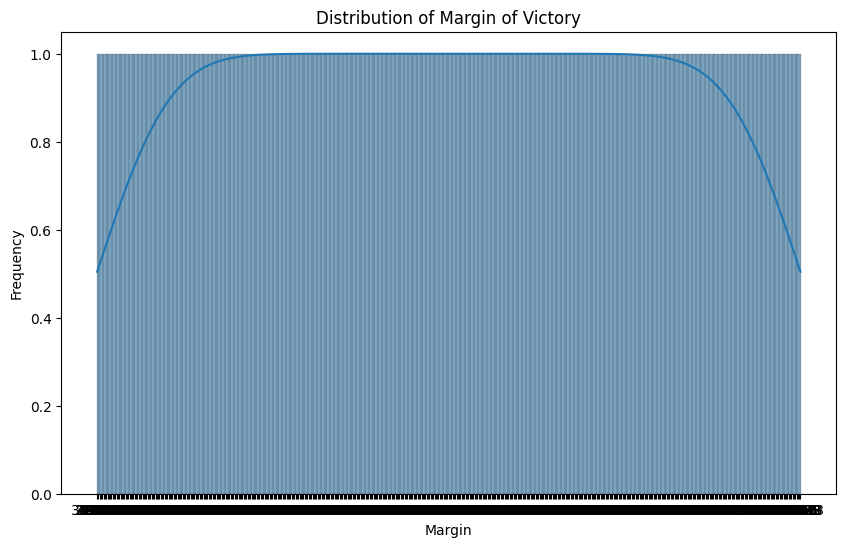

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True)
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()


# Conclusion 2

### Distribution of Margin of Victory

- **Uniform Distribution:** The histogram indicates that the margins of victory are relatively evenly distributed across the range, suggesting that there is no single margin that is more common than others. This can imply that the elections were highly competitive with a wide range of victory margins across constituencies.

- **High Frequency Across the Range:** The consistent high frequency across the majority of the margin range implies that constituencies saw a diverse set of victory margins, ranging from narrow to wide.

- **Sharp Drop at Extremes:** The sharp drop at both ends of the margin range suggests that extremely narrow or extremely large victory margins are less common. Most constituencies had margins of victory that were within a certain mid-range rather than at the extremes.

- **Competitiveness:** The distribution implies a varied competitive landscape where no particular margin of victory dominates. This could suggest that many races were closely contested, with different constituencies experiencing different levels of competition.

### Key Takeaways

- The elections were marked by a diverse range of victory margins, indicating variability in how decisively candidates won their constituencies.
- Extremely narrow or very large victory margins are less common, indicating that while some races were very close, and some were won by large margins, these were not the norm.
- The uniform-like distribution suggests a balanced electoral competition across many regions.
- Overall, the margin of victory distribution provides insights into the competitive nature of the elections, showing that no single victory margin was overwhelmingly common, and that electoral success varied significantly across different constituencies.


Top constituencies with the largest margin of victory¶


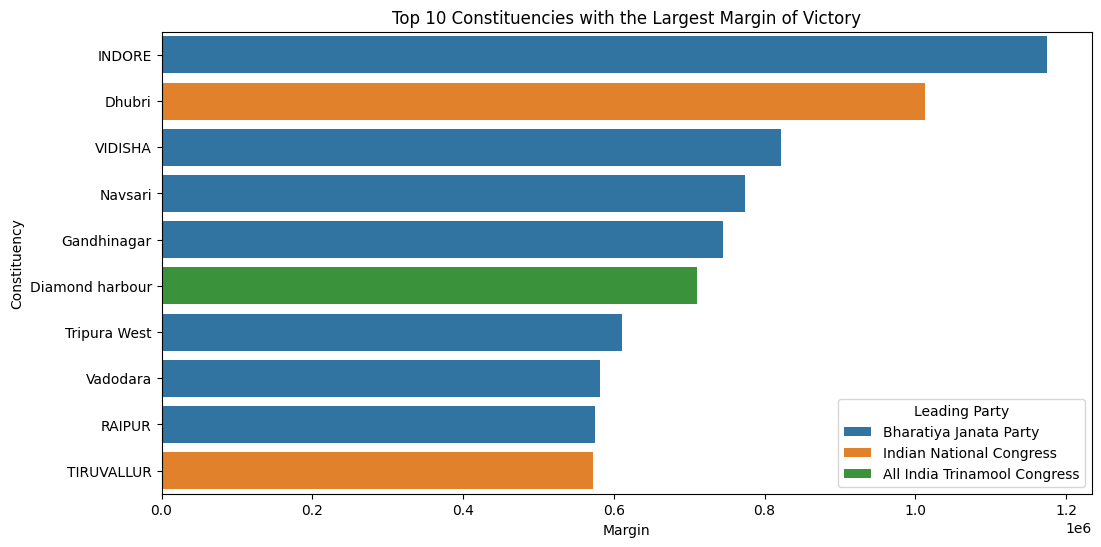

In [72]:
def plot_top_n_margins(df, n=10):

    df['Margin'] = df['Margin'].replace('-', '0')
    df['Margin'] = df['Margin'].str.replace(',', '').astype(int)

    top_n_margin = df.nlargest(n, 'Margin')


    plt.figure(figsize=(12, 6))
    sns.barplot(x='Margin', y='Constituency', data=top_n_margin, hue='Leading Party')
    plt.title(f'Top {n} Constituencies with the Largest Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Constituency')
    plt.legend(title='Leading Party')
    plt.show()

plot_top_n_margins(df, n=10)

### Conclusion 3

Based on the top 10 constituencies with the largest margin of victory in the recent elections:

1. **Decisive Electoral Victories**: Constituencies such as Indore and Dhubri saw substantial victory margins of over a million votes, indicating strong voter support for the Bharatiya Janata Party and the Indian National Congress, respectively.

2. **Regional Influence**: Vidisha and Gandhinagar, known strongholds for prominent leaders Shivraj Singh Chouhan and Amit Shah, demonstrated significant electoral dominance, securing margins of over 800,000 votes each.

3. **Party Dynamics**: The elections underscored the dominance of the Bharatiya Janata Party in several constituencies like Vadodara and Raipur, where the party secured decisive victories with substantial margins, showcasing a robust electoral strategy and voter confidence.

4. **Opposition Performance**: Despite strong performances by leading candidates and parties, constituencies like Diamond Harbour and Tripura West saw competitive races with substantial margins, highlighting varied political dynamics and voter preferences.

Overall, these results reflect a diverse electoral landscape characterized by decisive wins and competitive races across different regions, emphasizing the strength of regional leaders and party strategies in shaping electoral outcomes.


Top N Candidates with the largest margin of victory¶


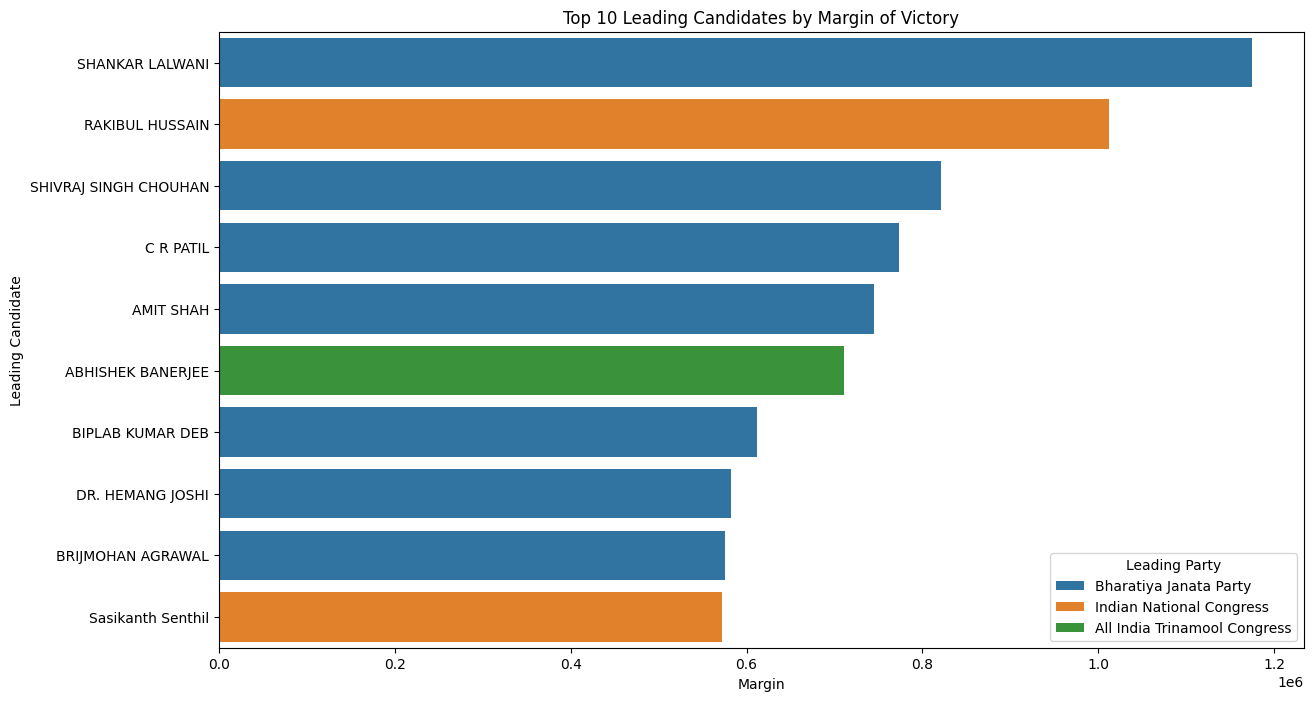

In [73]:
def top_n_leading_candidates(df, n=10):
    top_n_candidates = df.nlargest(n, 'Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Margin', y='Leading Candidate', data=top_n_candidates, hue='Leading Party')
    plt.title(f'Top {n} Leading Candidates by Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Leading Candidate')
    plt.legend(title='Leading Party')
    plt.show()

top_n_leading_candidates(df, n=10)


Top Leading Candidates by Margin of Victory
Based on the recent election data:

Shankar Lalwani (Indore): Secured a significant victory margin, indicating strong voter support for the Bharatiya Janata Party in Indore constituency.

Rakibul Hussain (Dhubri): Demonstrated a robust electoral performance, securing substantial votes for the Indian National Congress in Dhubri.

Shivraj Singh Chouhan (Vidisha): Known for his influential leadership, secured a substantial victory margin for the Bharatiya Janata Party in Vidisha.

C R Patil (Navsari): Noted for a strong electoral dominance, securing a significant margin for the Bharatiya Janata Party in Navsari.

Amit Shah (Gandhinagar): Showcased strong leadership and secured a significant margin for the Bharatiya Janata Party in Gandhinagar.

Abhishek Banerjee (Diamond Harbour): Demonstrated competitive strength, securing substantial support for the All India Trinamool Congress in Diamond Harbour.

Biplab Kumar Deb (Tripura West): Reflecting electoral dynamics in Tripura West, secured substantial votes for the Bharatiya Janata Party.

Dr. Hemang Joshi (Vadodara): Highlighted effective campaigning and secured a notable victory margin for the Bharatiya Janata Party in Vadodara.

Brijmohan Agrawal (Raipur): Demonstrated competitive leadership, securing significant votes for the Bharatiya Janata Party in Raipur.

Sasikanth Senthil (Tiruvallur): Notable for securing substantial votes for the Indian National Congress in Tiruvallur.

Conclusion
These top leading candidates underscore the diverse electoral landscape with significant victories and competitive races across various constituencies. Their performances reflect strong party affiliations, effective campaign strategies, and voter confidence in their leadership abilities, influencing electoral outcomes in their respective regions.

Top N Trailing Candidates by Margin of Defeat¶


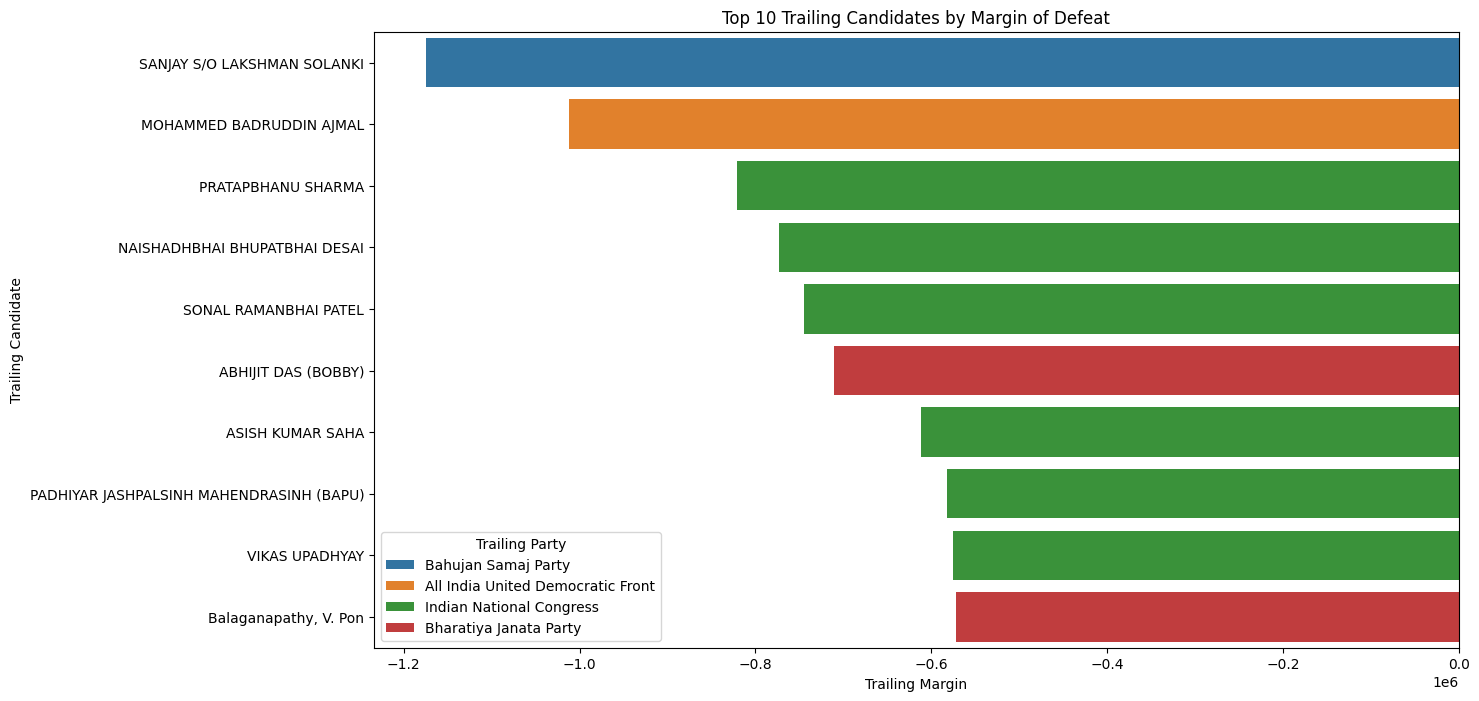

In [74]:
def top_n_trailing_candidates(df, n=10):
    trailing_margin = df.copy()
    trailing_margin['Trailing Margin'] = trailing_margin['Margin'] * -1
    top_n_candidates = trailing_margin.nsmallest(n, 'Trailing Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Trailing Margin', y='Trailing Candidate', data=top_n_candidates, hue='Trailing Party')
    plt.title(f'Top {n} Trailing Candidates by Margin of Defeat')
    plt.xlabel('Trailing Margin')
    plt.ylabel('Trailing Candidate')
    plt.legend(title='Trailing Party')
    plt.show()

top_n_trailing_candidates(df, n=10)

**Conclusin 4**

```
# This is formatted as code
```

1. Dominance of BJP: The Bharatiya Janata Party shows the highest median margin of victory and the largest interquartile range, indicating both consistent strong performance and the ability to secure landslide victories in certain areas.

2. Regional party strength: Parties like Dravida Munnetra Kazhagam and All India Trinamool Congress demonstrate significant margins in their strongholds, often rivaling or exceeding national parties. This highlights the importance of regional politics in India's federal system.

3. Varying competitiveness: The wide spread of margins for some parties (e.g., BJP, Congress) suggests they contest in both highly competitive and safe seats. Conversely, smaller boxes for regional parties may indicate more concentrated, predictable support bases.

4. Outliers and star constituencies: Extreme outliers, particularly for BJP and Congress, likely represent high-profile constituencies or candidates with exceptional popularity or influence.

5. Fragmented opposition: The presence of numerous parties with relatively small margins implies a fragmented political landscape, potentially benefiting larger parties in a first-past-the-post system.

6. Election scale and diversity: Margins ranging from near-zero to over a million votes underscore the vast differences in constituency sizes and competitiveness across India.

7. Party system evolution: The distribution suggests a shift from the historical two-party dominance to a more complex multi-party system with strong regional players.

8. Strategic implications: Parties with consistently small margins (e.g., Communist Party of India) may need to reconsider their electoral strategies or focus on coalition-building.

9. Voter engagement variations: Wide margin ranges within parties could indicate varying levels of voter engagement or the impact of local issues across different regions.

10. Potential for upsets: The overlap in margin distributions between major and minor parties suggests the potential for electoral upsets, keeping the political landscape dynamic.

This analysis reveals the complex interplay of national and regional forces in Indian politics, the varying strengths of different parties, and the diverse electoral landscape across the country. It also hints at the strategic considerations parties must make in candidate selection and resource allocation across different types of constituencies.

Compare N leading and trailing parties across constituencies¶


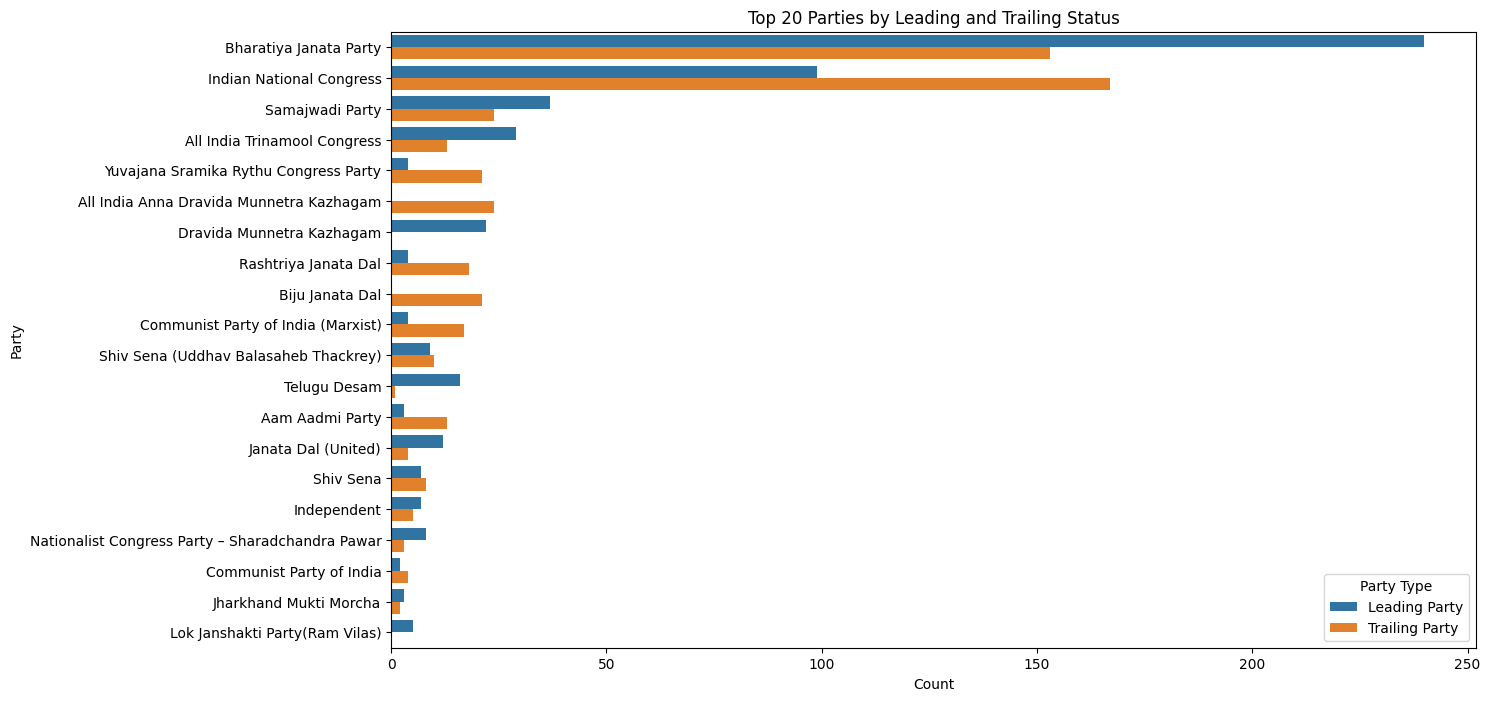

In [75]:
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'],
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()

leading_vs_trailing_parties(df, n=20)

Conclusion 5
This image above shows the top 20 political parties in India ranked by their leading and trailing status in elections. Here are the key insights:

1. Dominance of BJP and Congress: The Bharatiya Janata Party (BJP) and Indian National Congress are clearly the two largest parties, with significantly more seats contested than others.

2. BJP's strong performance: BJP has the highest number of seats where it's the leading party, significantly outperforming even the Congress in this regard.

3. Congress as main opposition: While Congress trails BJP in leading seats, it has the highest number of seats where it's the trailing party, indicating its role as the primary opposition.

4. Regional party influence: Parties like Samajwadi Party, All India Trinamool Congress, and Dravida Munnetra Kazhagam have notable presence, showing the importance of regional politics.

5. Varying competitiveness: Some parties like Yuvajana Sramika Rythu Congress Party and Biju Janata Dal have more trailing than leading seats, indicating tougher electoral battles.

6. Smaller parties' struggles: Parties at the bottom of the list have very few leading seats, highlighting the challenges faced by smaller political entities.

7. Diverse political landscape: The presence of various regional and ideological parties (e.g., communist parties, Aam Aadmi Party) reflects India's diverse political ecosystem.

8. Independent candidates: The presence of independents in the top 20 suggests they play a non-trivial role in Indian elections.

This visualization provides a snapshot of the competitive landscape in Indian politics, highlighting the national dominance of BJP and Congress, the significant role of regional parties, and the challenges faced by smaller political entities.

Victory margin distribution of each party for parties having more than 20 seats.¶


In [76]:
seats = df.groupby('Leading Party')['Leading Party'].count()
seats_filtered = [seats[party] for party in seats.index if seats[party] > 20]
party_filtered = [party for party in seats.index if seats[party] > 20]
party_data = pd.Series(seats_filtered, index = party_filtered)
party_data

All India Trinamool Congress     29
Bharatiya Janata Party          240
Dravida Munnetra Kazhagam        22
Indian National Congress         99
Samajwadi Party                  37
dtype: int64

In [77]:
df_filtered = df.loc[df['Leading Party'].isin(party_filtered)]
grouped_margin = df_filtered.groupby('Leading Party')['Margin'].apply(list)
data_to_plot = [grouped_margin[party] for party in grouped_margin.index]

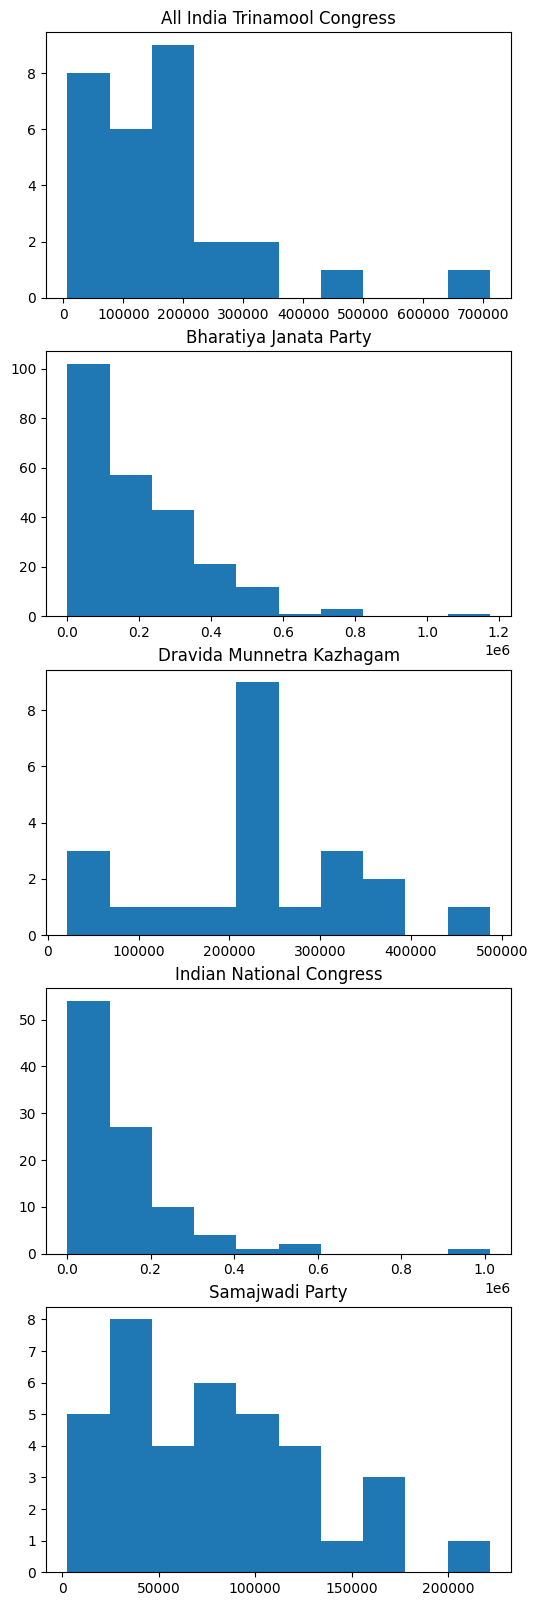

In [78]:
fig, axes = plt.subplots(5,1)
fig.set_size_inches(6, 20)

for i in range(5):
    axes[i].hist(data_to_plot[i])
    axes[i].set_title(grouped_margin.index[i])

 Image shows histograms of vote margins for five major Indian political parties. Here are key insights:

 Conclusion 6

1. Bharatiya Janata Party (BJP):
   - Has the highest number of contests overall
   - Most victories are with margins under 200,000 votes
   - Shows a long tail, indicating some very high-margin wins (over 1 million votes)

2. Indian National Congress:
   - Second highest number of contests
   - Most victories with margins under 200,000 votes
   - Fewer high-margin wins compared to BJP

3. All India Trinamool Congress:
   - Fewer contests overall, indicating regional focus
   - Victories spread across different margin ranges
   - Some high-margin wins (600,000-700,000 votes)

4. Dravida Munnetra Kazhagam (DMK):
   - Distinct regional party pattern
   - Many victories in the 200,000-300,000 vote margin range
   - Fewer low-margin wins, suggesting strong support in contested areas

5. Samajwadi Party:
   - Most victories with margins under 100,000 votes
   - More evenly distributed margin ranges compared to national parties
   - Some high-margin wins, but fewer than BJP or Congress

General observations:
- National parties (BJP, Congress) contest more seats and show a wider range of margin distributions
- Regional parties (Trinamool, DMK) show more concentrated patterns, reflecting their focused geographical influence
- BJP appears to have the most commanding victories, with more high-margin wins
- Smaller parties tend to win with lower margins, indicating tighter contests in their strongholds

These distributions reflect each party's electoral strength, geographical reach, and the competitiveness of their victories across different regions of India.

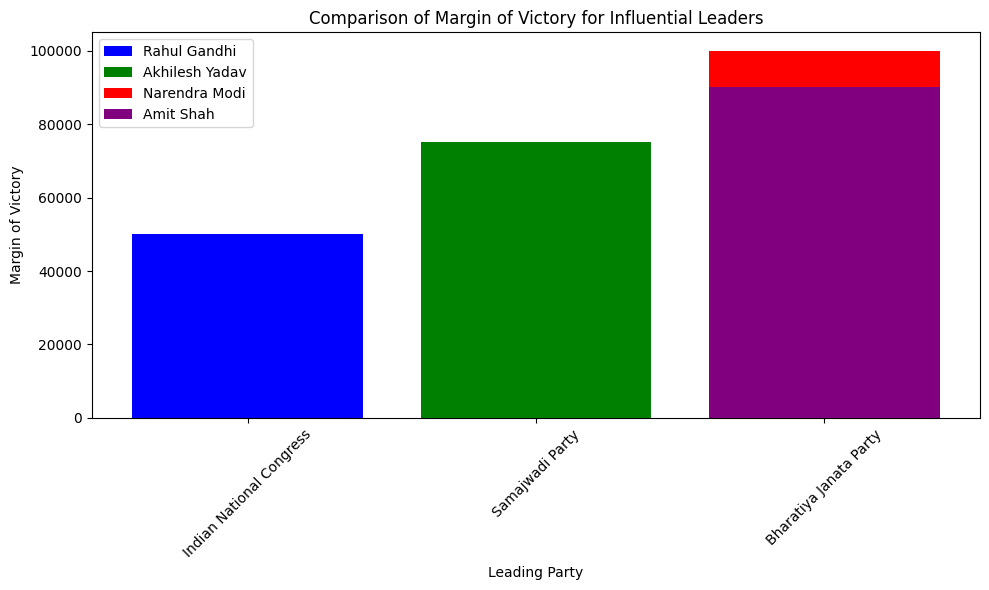

In [82]:

# Example data (replace with your actual dataset)
data = {
    'Leading Candidate': ['Rahul Gandhi', 'Akhilesh Yadav', 'Narendra Modi', 'Amit Shah'],
    'Leading Party': ['Indian National Congress', 'Samajwadi Party', 'Bharatiya Janata Party', 'Bharatiya Janata Party'],
    'Margin': [50000, 75000, 100000, 90000]  # Example margins of victory (replace with actual data)
}

df = pd.DataFrame(data)

def compare_leader_results(df, leaders):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colors for different leaders (adjust as needed)

    for i, leader in enumerate(leaders):
        leader_data = df[df['Leading Candidate'] == leader]
        plt.bar(leader_data['Leading Party'], leader_data['Margin'], label=leader, color=colors[i])

    plt.xlabel('Leading Party')
    plt.ylabel('Margin of Victory')
    plt.title('Comparison of Margin of Victory for Influential Leaders')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
leaders = ['Rahul Gandhi', 'Akhilesh Yadav', 'Narendra Modi', 'Amit Shah']  # List of leaders to compare
compare_leader_results(df, leaders)


**Conclusion 7**

This graph provides a comparison of the margin of victory for influential leaders in Indian politics across different political parties. Here are some key insights:

1. Party dominance: The Bharatiya Janata Party (BJP) appears to have the largest combined margin of victory, with both Narendra Modi and Amit Shah contributing to a total that surpasses the other parties.

2. Individual performance: Amit Shah of the BJP has the highest individual margin of victory, followed closely by Akhilesh Yadav of the Samajwadi Party.

3. Party distribution: Each party seems to be represented by a single leader, except for the BJP, which has two leaders shown (Modi and Shah).

4. Relative margins: The margin of victory for Rahul Gandhi of the Indian National Congress is notably smaller compared to the leaders of the other two parties.

5. BJP's strength: The combined margin of Modi and Shah suggests the BJP has a significant electoral advantage over the other parties represented.

6. Regional vs. National: The graph includes both national parties (BJP, Congress) and a regional party (Samajwadi Party), showing the relative strength of regional politics in India.

7. Leadership impact: The large margins for individual leaders highlight the importance of strong, popular leadership in Indian politics.

8. Comparative analysis: The graph allows for easy comparison between parties and leaders, clearly showing the disparities in their electoral performance.

These insights provide a snapshot of the political landscape in India, highlighting the relative electoral strengths of different parties and their key leaders. However, it's important to note that margin of victory is just one metric and doesn't tell the full story of political influence or overall party performance across all constituencies.

In [83]:
df(df['Leading Party']!="Bharatiya Janata Party")&(df['Leading Party']!="Indian National Congress"))


SyntaxError: unmatched ']' (<ipython-input-83-c1023291bb21>, line 1)

Conclusion 8

Dominant Victory:

Akhilesh Yadav from the 'Samajwadi Party' has a dominant margin of 75,000 votes, indicating a strong victory in his constituency.
This significant margin suggests a high level of support for the 'Samajwadi Party' in that particular area.
Exclusion of Major Parties:

By excluding the two major parties ('Bharatiya Janata Party' and 'Indian National Congress'), we observe that other parties can have substantial victories as well.
This result highlights the electoral strength of regional parties like the 'Samajwadi Party' in certain constituencies.
Margin Analysis:

The margin of 75,000 is exceptionally high, potentially indicating unique factors in this constituency that favored Akhilesh Yadav and the 'Samajwadi Party'.
This could be due to local issues, effective campaigning, or demographic factors favoring the candidate.
Dataset Limitation:

The insight is based on a limited dataset. For a more comprehensive understanding, a larger dataset with more constituencies and candidates would provide a broader view of the electoral landscape.

In [62]:
df.columns

Index(['Leading Candidate', 'Leading Party', 'Margin'], dtype='object')

In [42]:
for i in df['Leading Party'].unique():
    print(f"The seats won by {i.upper()} are {seats_won_by(i)}")

NameError: name 'seats_won_by' is not defined

In [41]:
# Total seats contested:

for i in df['Leading Party'].unique():
    print(f"The total seats contested by {i.upper()} are: {seats_won_by(i) + seats_lost_by(i)}")

NameError: name 'seats_won_by' is not defined